Problem Statement 
The following table shows the results of a recently conducted
study on the correlation of the number of hours spent driving
with the risk of developing acute backache. Find the equation of
the best fit line for this data.

X (Driving hrs) = { 10 , 8 , 2 , 15 , 10 , 16 , 11 , 16 }

 Y (risk score)= { 95 , 80 , 10 , 50 , 45 , 98 , 38 , 93 }

REMEBER

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('Data.csv')
df



,Hours,Risk
0,10,95
1,9,80
2,2,10
3,15,50
4,10,45
5,16,98
6,11,38
7,16,93





#Understand
Here data is

Domain = X (hrs) = { 10 , 8 , 2 , 15 , 10 , 16 , 11 , 16 }

Range = Y (risk)= { 95 , 80 , 10 , 50 , 45 , 98 , 38 , 93 }

Why Machine Learning?

-> In the data X(hrs of driving) and Y(risk score) are having one to many mapping so we have to find mapping function that maps domain to range.
(In this case there is one to many mapping but it can be also one to one mapping but in that case we need not to use Linear Regression and can be solved by mathematical formula)

Why Supervised learning?

-> Given data accepts feature X(hrs) mapping with Output label Y(risk) and hence it is Supervised Learning.




Now for finding best fit line the equation of line is y = mx + c


But in data observation is that for X=10 maps to 2 values 95 and 45 so to remove this confusion there is need to add new feature

Refering to the paper [(Paper)](https://open.library.ubc.ca/cIRcle/collections/facultyresearchandpublications/52383/items/1.0048193) 

(CREATE)

So created WBV(whole body vibration) as a feature in the data.WBV is defined as the mechanical vibration that, when transmitted to the whole body, entails risks to the health and safety of drivers, in particular lower-back morbidity and trauma of the spine.


X = { 10 , 8 , 2 , 15 , 10 , 16 , 11 , 16 }

WBV = { 85 , 60 , 4 , 20 , 30 , 90 , 15 , 88 } 

Y = { 95 , 80 , 10 , 50 , 45 , 98 , 38 , 93 }








Programmer's Perspective

 Let S be our system

S = { s, e, X, Y , fme,ffi | phi}

s (start state) = system take input of the data

        s = {Xi Yi| i∈N 1<=Xi<=20 and 0<=Yi<=100 }
        
        s is constructor of class i.e. system()


e (end state) = system predict output

        predict_output() function of class 
        best fit line with equation y=mx+c

X (input set) = {X1,X2,X3} 



        X = {hours,wbv,risk}

        X1=hours spending in driving { 10 , 8 , 2 , 15 , 10 , 16 , 11 , 16 }   1<=X1<=20

        X2=WBV { 85 , 60 , 4 , 20 , 30 , 90 , 15 , 88 } 1<=X2<=100

        X3=risk score of back pain { 95 , 80 , 10 , 50 , 45 , 98 , 38 , 93 }  0<=X3<=100

Y (outcomes) = {Y0,Y1,Y2} 

        Y = { predict_output() , slope_intercept() ,rmse }

        Specifying Functions

        Domain(X) = {10,8,2,15,16,11} input

           y = f0(x) = b0(X(i)) + b1 
            
            b0=slope and b1=y-intercept

        Range {95,80,10,50,45,98,38,93}   output

        

fme - does the transformation of start to end state

        main function prediction_output()

ffi - set of friend function

        {f0 -> calculate_mean(),
        
        f1 -> calc_variance() ,
        
        f2 -> coefficients()}



In [ ]:
import numpy as np
class system:
    def __init__(self,hours,wbv,risk_score):
        #start state
        self.hours=hours
        self.wbv=wbv
        self.risk_score=risk_score
        self.total_sample=len(self.hours)
        self.X=self.initialize_X()
        self.Y=self.initialize_Y()
    
    
    def initialize_X(self):
        self.total_sample=len(self.hours)
        self.X=np.zeros((self.total_sample,3))
        for i in range(self.total_sample):
            self.X[i]=[1,x[i],y[i]]
        return self.X
    
    def initialize_Y(self):
        self.Y=np.array([[]])
        for i in range(self.total_sample):
            self.Y=np.append(self.Y,z[i])
        return self.Y
    
    def find_transpose(self,X):
        return X.T
    
    def find_inverse(self,X):
        return np.linalg.inv(X)
    
    def calculate_coef(self):
        #(ANALYZE)
        #this function do calculation of normal equaion
        #theta=(X.T . X)^-1 . X.T . Y (for linear regression)
        X_transpose=self.find_transpose(self.X)
        X_new=X_transpose.dot(self.X)
        X_inv=self.find_inverse(X_new)
        theta=X_inv.dot(self.find_transpose(self.X)).dot(self.Y)
        return theta
    def predict_y(self,theta):
        Y_pred=[]
        for i in range (self.total_sample):
            # ans = theta0 + theta1*x1 + theta2*x2 
            res=theta[0]+theta[1]*self.hours[i]+theta[2]*self.wbv[i]
            Y_pred.append(res)
        return Y_pred
    
    
    def predict_output(self):
        #this is end state of system
        theta=self.calculate_coef()
        #(APPLY)
        Y_pred=self.predict_y(theta)
        import sklearn.metrics as sm
        R2_score = round(sm.r2_score(self.risk_score, Y_pred), 2)
            
        return theta,Y_pred,R2_score
        


In [ ]:
x=[10,8,2,15,10,16,11,16]
y = [85,60,5,20,30,82,15,80]
z =[95,80,10,50,45,98,38,93]

In [ ]:
obj=system(x,y,z)

In [ ]:
c,y,ac=obj.predict_output()

In [ ]:
ac

0.98

In [ ]:
y

[94.47280984842452,
 70.45628032047415,
 15.42151044129788,
 46.044664425998526,
 47.6820584105688,
 100.16460548404385,
 36.29494745561612,
 98.46312361357639]

SCRATCH

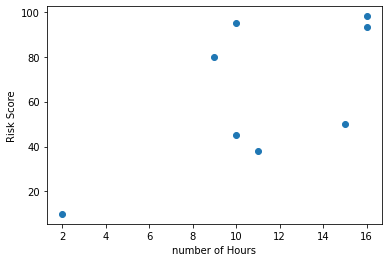

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Hours '], df['Risk'])
plt.xlabel('number of Hours')
plt.ylabel('Risk Score')
plt.show()

Calculate Mean and Covariance

(REMEMBER)

In [ ]:
x = df['Hours '].values
y = df['Risk'].values

In [ ]:
def mean(values):
    return np.mean(values)


In [ ]:
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

In [ ]:
mean_X, mean_Y = mean(x), mean(y)

In [ ]:
var_x, var_y = variance(x, mean_X), variance(y, mean_Y)


In [ ]:
print(mean_X, var_x)

11.125 152.875


In [ ]:
print(mean_Y, var_y)

63.625 7361.875


In [ ]:
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x)*(y[i] - mean_y)
    return covar

In [ ]:
covariance(x, mean_X, y, mean_Y)

701.375

In [ ]:
def coefficients(data):
    a,b = list(data)
    x = data[a].values
    y = data[b].values
    mean_x, mean_y = mean(x), mean(y)
    b1 = covariance(x, mean_x, y, mean_y) / variance(x, mean_x)
    b0 = mean_y - b1 * mean_x
    return [b0, b1]

EVALUATE

In [ ]:
coefficients(df)

[12.584627964022893, 4.58789860997547]

In [ ]:
predictions = []
b0, b1 = coefficients(df)
for i,row in df.iterrows():
    ynew = b0 + b1 * row['Hours ']
    predictions.append(ynew)

In [ ]:
predictions

[58.46361406377759,
 53.87571545380212,
 21.760425183973833,
 81.40310711365495,
 58.46361406377759,
 85.99100572363042,
 63.05151267375307,
 85.99100572363042]

ANALYZE

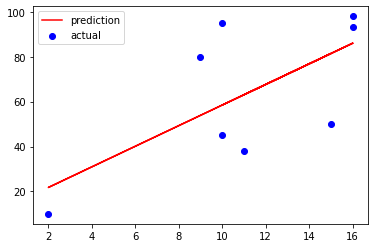

In [ ]:
regression_line = [(b0 + b1*x) for x in x]
plt.scatter(x, df['Risk'], c='b', label='actual')
plt.plot(x, regression_line, c='r', label='prediction')
plt.legend(loc='upper left')
plt.show()

In [ ]:
from math import sqrt

def rmse(actual, predicted):
    sum_err = 0.0
    for i in range(len(actual)):
        pred_err = predicted[i] - actual[i]
        sum_err += pred_err**2
    mean_err = sum_err / float(len(actual))
    return sqrt(mean_err)

In [ ]:
rmse(y, predictions)

22.759716640449565